### Nearest neighbor for handwritten digit recognition

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
import time

In [2]:
## Load the training set
train_data = np.load('MNIST/train_data.npy')
train_labels = np.load('MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('MNIST/test_data.npy')
test_labels = np.load('MNIST/test_labels.npy')

In [3]:
train_data.shape

(7500, 784)

In [4]:
train_labels.shape

(7500,)

###  Visualizing the data

In [22]:
def plot_img(x):
    plt.axis("off")
    plt.imshow(x.reshape(28,28), cmap=plt.cm.gray)
    return 

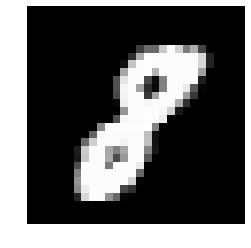

In [23]:
plot_img(train_data[2])

### Squared Euclidean distance

To compute nearest neighbors in our data set, we need to first to compute distances between data points. A natural distance function is _Euclidean distance_: for two vectors $x, y \in \mathbb{R}^d$, their Euclidean distance is defined as 
$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$


In [13]:
def squared_distance(x,y):
    return np.sum(np.square(x-y))

print(squared_distance(train_data[2,], train_data[3,]))

5963946.0


### Comptute Nearest Neighbor

In [15]:
def find_NN(x):
    dists = [squared_distance(x, train_data[i,]) for i in range(train_data.shape[0])]
    # Get the index of the smallest distance
    return np.argmin(dists)

def classify_NN(x):
    idx = find_NN(x)
    return train_data[idx,]

### Test

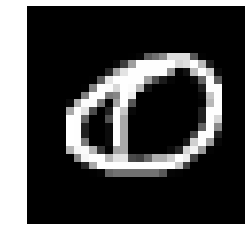

In [25]:
plot_img(test_data[0])

Its nearest neighbor from the train_data


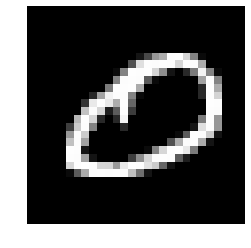

In [27]:
plot_img(test_data[0])
pred = classify_NN(test_data[0])
print("Its nearest neighbor from the train_data")
plot_img(pred)

### Fast Approach: Kd-Tree Complexity O(nlogn)
We will use scikit-learn implementation of this nearest neighbor data structure. The tree is constructed based on the median location. There are many possible ways to choose axis-aligned splitting planes, so we select axis based on depth so that axis cycles through all valid values: axis = depth % d (d is the dimension of the points, here 28*28).<br>
(wikipedia: https://en.wikipedia.org/wiki/K-d_tree )

In [28]:
from sklearn.neighbors import KDTree

In [30]:
t0 = time.time()
kd_tree = KDTree(train_data)
t = time.time()

In [32]:
print("Time needed to construct the tree in seconds", t - t0)

Time needed to construct the tree in seconds 1.0313663482666016


In [35]:
predictions = kd_tree.query(test_data, k=1, return_distance=False)
predictions = np.squeeze(predictions)

In [36]:
predictions #indexes

array([6696, 1363, 4002, 7495, 6368, 5858, 5881, 3730, 5750, 4911, 2145,
       5479, 2838, 1218, 7202, 4791, 6906,  348, 6657, 5533, 6843, 5305,
       2779,  894, 3702, 3939,  762, 3604, 4742, 5868, 5459,  357, 6733,
       6914, 3632, 5463, 6265, 1468, 4293, 4455, 2448, 5553, 3974, 4405,
       7384, 3374, 3941, 2014, 5146, 6492, 3148, 5340, 3811, 3931, 3123,
       3469, 6264,  359, 1823, 7069, 4108, 3753, 3460, 2403, 4453, 1399,
       2841, 2036, 4099, 2458,  464, 5850, 2186, 2720, 2206, 4664, 3689,
       1087, 5160, 4558, 4998, 7454, 5675, 3108, 2514, 5540, 7444, 4392,
       6225, 2154, 4588,  453, 1221, 2913, 4325,   72, 2186, 4742, 1384,
       1844, 4711,  532, 6190, 1030, 6566, 3068, 6503, 5139, 3389, 4333,
       3415, 6830,  928, 6788, 3666,  968, 2236, 3844, 6687, 4820, 2858,
        206, 1712,  964, 4974, 2519, 1363, 3635, 3842, 7487, 7141, 5524,
       6183,  566, 2734,  824, 1503, 5027, 2231, 5708, 4343, 4241, 4480,
       3939, 3507,  384, 4837, 6432, 6443, 5502, 42

In [37]:
results = train_data[predictions]